In [1]:
from scipy.constants import c, h, k as k_B

In [5]:
f_lpf, T_lpf = np.loadtxt('/Users/daniel/Johnson+Miller/equipment/Cardiff/Cardiff_5.7_icm_LP_filter_transmittance.txt', unpack=True)

In [22]:
def lpf_transmission(f):
    return np.interp(f, 1e9 * f_lpf, T_lpf)
    
def waveguide_transmission(f, f_cutoff=130e9):
    return (f > f_cutoff).astype(np.float)

def transmission(f, f_cutoff=130e9):
    return lpf_transmission(f) * waveguide_transmission(f)

In [23]:
# The thermal occupancy of a single spatial/polarization mode.
def n_thermal(nu, T):
    return (np.exp(h * nu / (k_B * T)) - 1)**-1

Calculate the absorbed power and NEP using the narrowband approximation.

In [66]:
nu0 = 150e9
B = 170e9 - 130e9
emissivity = 1
T_bb = 2
eta_I = 0.7
P_A = eta_I * emissivity * n_thermal(nu0, T_bb) * h * nu0 * B
1e12 * P_A

0.078222232253651491

In [67]:
# Add an equal recombination noise term
NEP_A2 = 2 * h * nu0 * P_A
(2 * NEP_A2)**(1/2)

5.5765901023836741e-18

In [65]:
transmission(np.array([nu0]))[0]

0.9425403179392825

Repeat the calculation by integrating across the band.

In [59]:
nu = np.linspace(120e9, 220e9, 1e3)

In [60]:
rho_A = eta_I * transmission(nu) * emissivity * n_thermal(nu, 2) * h * nu

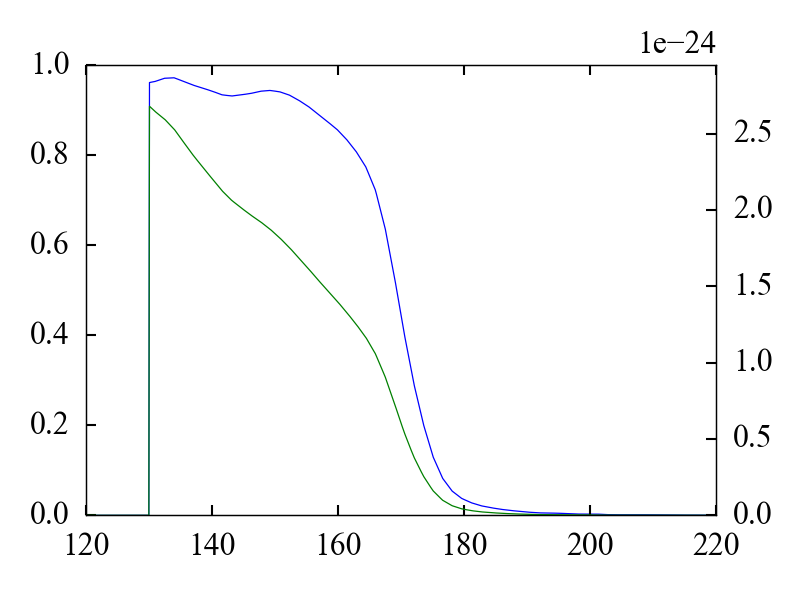

In [63]:
fig, T_ax = plt.subplots()
rho_ax = T_ax.twinx()
T_ax.plot(1e-9 * nu, transmission(nu))
rho_ax.plot(1e-9 * nu, rho_A, 'g')
rho_ax.set_ylim(0, 1.1 * rho_A.max());

In [38]:
P_A = np.trapz(rho_A, nu)
1e12 * P_A

0.074164639278078454

In [40]:
NEP_A2 = np.trapz(2 * h * nu * rho_A, nu)
NEP_A2**(1/2)

3.8070704562515885e-18

In [41]:
(2 * NEP_A2)**(1/2)

5.3840106721409237e-18